In [123]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None



In [124]:
data = pd.read_csv("../data/LBNL_file.csv", low_memory=False)

df5 = data.replace([-9999, '-9999', -9999.0], np.nan)
df5["installation_date"] = pd.to_datetime(df5["installation_date"])

In [125]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df5["module_manufacturer_1"] = label_encoder.fit_transform(df5["module_manufacturer_1"])
df5["technology_module_1"] = label_encoder.fit_transform(df5["technology_module_1"])
df5["inverter_manufacturer_1"] = label_encoder.fit_transform(df5["inverter_manufacturer_1"])
df5["module_model_1"] = label_encoder.fit_transform(df5["module_model_1"])
df5["inverter_model_1"] = label_encoder.fit_transform(df5["inverter_model_1"])
df5["city"] = label_encoder.fit_transform(df5["city"])
df5["utility_service_territory"] = label_encoder.fit_transform(df5["utility_service_territory"])
df5["installer_name"] = label_encoder.fit_transform(df5["installer_name"])
#df5["state"] = label_encoder.fit_transform(df5["state"])

In [126]:

#df5["installation_date"] = pd.to_datetime(df5["installation_date"])


df5.head(5)

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,zip_code,city,state,utility_service_territory,third_party_owned,installer_name,self_installed,azimuth_1,azimuth_2,azimuth_3,tilt_1,tilt_2,tilt_3,module_manufacturer_1,module_model_1,module_quantity_1,module_manufacturer_2,module_model_2,module_quantity_2,module_manufacturer_3,module_model_3,module_quantity_3,additional_modules,technology_module_1,technology_module_2,technology_module_3,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_manufacturer_2,inverter_model_2,inverter_quantity_2,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,solar_storage_hybrid_inverter_3,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arkansas State Energy Office,NaN,NaN,NaN,2010-04-29,2.016,14558.0,0.0,RES,0,0,NaN,0.0,0.0,71953,1420,AR,25,0.0,2462,0.0,NaN,NaN,NaN,NaN,NaN,NaN,237,3012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,49,1435,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
1,Arkansas State Energy Office,NaN,NaN,NaN,2010-04-26,3.360,26096.0,0.0,RES,0,0,NaN,0.0,0.0,72641,1039,AR,4,0.0,2462,0.0,NaN,NaN,NaN,NaN,NaN,NaN,237,3012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,49,1435,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
2,Arkansas State Energy Office,NaN,NaN,NaN,2010-04-20,13.440,91139.0,0.0,RES,0,0,NaN,0.0,0.0,71801,979,AR,13,0.0,2462,0.0,NaN,NaN,NaN,NaN,NaN,NaN,237,3012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,49,1435,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
3,Arkansas State Energy Office,NaN,NaN,NaN,2010-04-21,5.520,40043.0,0.0,RES,0,0,NaN,0.0,0.0,71909,983,AR,12,0.0,2462,0.0,NaN,NaN,NaN,NaN,NaN,NaN,237,3082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,230.0,NaN,NaN,0.141090,NaN,NaN,49,1435,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN
4,Arkansas State Energy Office,NaN,NaN,NaN,2010-04-22,2.530,21497.0,0.0,RES,0,0,NaN,0.0,0.0,71909,983,AR,9,0.0,2462,0.0,NaN,NaN,NaN,NaN,NaN,NaN,237,3082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,230.0,NaN,NaN,0.141090,NaN,NaN,49,1435,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN


In [127]:
df5["battery_rated_capacity_kW"] = df5["battery_rated_capacity_kW"].replace(np.nan, 0)
df5["battery_rated_capacity_kWh"] = df5["battery_rated_capacity_kWh"].replace(np.nan, 0)

esim109 = df5.corrwith(df5["total_installed_price"])

esim109.to_frame().T

,system_size_DC,total_installed_price,rebate_or_grant,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,city,utility_service_territory,third_party_owned,installer_name,self_installed,azimuth_1,azimuth_2,azimuth_3,tilt_1,tilt_2,tilt_3,module_manufacturer_1,module_model_1,module_quantity_1,module_quantity_2,module_quantity_3,additional_modules,technology_module_1,technology_module_3,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_quantity_2,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,solar_storage_hybrid_inverter_3,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,0.735356,1.0,0.244279,0.001553,0.032726,-0.280077,0.089742,0.141472,0.004484,-0.013555,-0.015076,-0.013591,-0.012437,-0.005036,0.003793,0.004423,-0.073553,-0.177069,-0.227959,0.01382,0.001428,0.725707,0.409925,0.734652,0.018886,0.029518,NaN,0.00132,0.012251,0.006521,-0.000213,0.001249,NaN,0.006466,0.037092,0.025557,-0.037168,-0.032994,-0.057854,0.007002,-0.021419,0.038226,0.135598,0.224984,0.080693,-0.049,-0.039244,-0.133793,-0.000863,-0.016343,NaN,0.024771,-0.059796,-0.009988,0.565122,0.597944,0.488698,-0.035567,0.01422,0.120247,0.046022


In [128]:
cols = ['installation_date', 'system_size_DC', 'total_installed_price',
        'customer_segment', 'expansion_system', "state", "ground_mounted","rebate_or_grant" ,
       'multiple_phase_system', 'new_construction', 'third_party_owned', 
       'self_installed',  'module_manufacturer_1', 'module_model_1',
       'module_quantity_1', 'module_manufacturer_2', 'module_model_2',
       'module_quantity_2', 'module_manufacturer_3', 'module_model_3',
       'module_quantity_3', 'additional_modules', 'technology_module_1',
       'technology_module_2', 'BIPV_module_1',
       'BIPV_module_2', 'BIPV_module_3', 'bifacial_module_1',
       'bifacial_module_2', 'bifacial_module_3', 'nameplate_capacity_module_1',
       'nameplate_capacity_module_2', 'nameplate_capacity_module_3',
       'efficiency_module_1', 'efficiency_module_2', 'efficiency_module_3',
       'inverter_manufacturer_1', 'inverter_model_1', 'inverter_quantity_1',
       'inverter_manufacturer_2', 'inverter_model_2', 'inverter_quantity_2',
       'inverter_manufacturer_3', 'inverter_model_3', 'inverter_quantity_3',
       'additional_inverters', 'micro_inverter_1', 'micro_inverter_2',
       'micro_inverter_3', 'solar_storage_hybrid_inverter_1',
       'solar_storage_hybrid_inverter_2', 
       'built_in_meter_inverter_1', 'built_in_meter_inverter_2',
       'built_in_meter_inverter_3', 'output_capacity_inverter_1',
       'output_capacity_inverter_2', 'output_capacity_inverter_3',
       'DC_optimizer', 'inverter_loading_ratio', 'battery_rated_capacity_kW',
       'battery_rated_capacity_kWh', 
       "city", "utility_service_territory", "installer_name", "module_manufacturer_1", "module_model_1", "technology_module_1", "inverter_manufacturer_1", "inverter_model_1" ]

In [129]:
df_clean = df5[cols].copy()

df_clean.head(10)

,installation_date,system_size_DC,total_installed_price,customer_segment,expansion_system,state,ground_mounted,rebate_or_grant,multiple_phase_system,new_construction,third_party_owned,self_installed,module_manufacturer_1,module_model_1,module_quantity_1,module_manufacturer_2,module_model_2,module_quantity_2,module_manufacturer_3,module_model_3,module_quantity_3,additional_modules,technology_module_1,technology_module_2,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_manufacturer_2,inverter_model_2,inverter_quantity_2,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,city,utility_service_territory,installer_name,module_manufacturer_1,module_model_1,technology_module_1,inverter_manufacturer_1,inverter_model_1
0,2010-04-29,2.016,14558.0,RES,0,AR,0.0,0.0,0,NaN,0.0,0.0,237,3012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,49,1435,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,0.0,0.0,1420,25,2462,237,3012,4,49,1435
1,2010-04-26,3.360,26096.0,RES,0,AR,0.0,0.0,0,NaN,0.0,0.0,237,3012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,49,1435,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,0.0,0.0,1039,4,2462,237,3012,4,49,1435
2,2010-04-20,13.440,91139.0,RES,0,AR,0.0,0.0,0,NaN,0.0,0.0,237,3012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,49,1435,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,0.0,0.0,979,13,2462,237,3012,4,49,1435
3,2010-04-21,5.520,40043.0,RES,0,AR,0.0,0.0,0,NaN,0.0,0.0,237,3082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,230.0,NaN,NaN,0.141090,NaN,NaN,49,1435,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,0.0,0.0,983,12,2462,237,3082,3,49,1435
4,2010-04-22,2.530,21497.0,RES,0,AR,0.0,0.0,0,NaN,0.0,0.0,237,3082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,230.0,NaN,NaN,0.141090,NaN,NaN,49,1435,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,0.0,0.0,983,9,2462,237,3082,3,49,1435
5,2010-04-22,3.450,30617.0,RES,0,AR,0.0,0.0,0,NaN,0.0,0.0,237,3082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,230.0,NaN,NaN,0.141090,NaN,NaN,49,1435,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,0.0,0.0,983,9,2462,237,3082,3,49,1435
6,2010-04-21,3.220,27978.0,RES,0,AR,0.0,0.0,0,NaN,0.0,0.0,237,3082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,230.0,NaN,NaN,0.141090,NaN,NaN,49,1435,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,0.0,0.0,983,12,2462,237,3082,3,49,1435
7,2010-05-18,12.880,90873.0,RES,0,AR,0.0,0.0,0,NaN,0.0,0.0,338,5674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,1435,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,0.0,0.0,983,12,2462,338,5674,5,49,1435
8,2010-06-03,3.360,26166.0,RES,0,AR,1.0,0.0,0,NaN,0.0,0.0,237,3012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,49,1435,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0

In [130]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 69 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   installation_date                1000000 non-null  datetime64[ns]
 1   system_size_DC                   988692 non-null   float64       
 2   total_installed_price            814364 non-null   float64       
 3   customer_segment                 1000000 non-null  object        
 4   expansion_system                 1000000 non-null  int64         
 5   state                            1000000 non-null  object        
 6   ground_mounted                   759462 non-null   float64       
 7   rebate_or_grant                  954632 non-null   float64       
 8   multiple_phase_system            1000000 non-null  int64         
 9   new_construction                 207044 non-null   float64       
 10  third_party_owned              

In [131]:
#df_clean = df_clean[(df_clean["module_quantity_2"].notnull()) | (df_clean["module_quantity_3"].notnull())]

#df_clean = df_clean.dropna(subset=["system_size_DC","total_installed_price"])

#df_clean = df_clean[df_clean['total_installed_price'].isnull()]

df_clean = df_clean[df_clean["state"] == "CA"]      # Koska muita osavaltioita on van reilu 1k ja halutaan tehdä tästä pelkästään californiaa koskeva

In [132]:
df_clean.head()

,installation_date,system_size_DC,total_installed_price,customer_segment,expansion_system,state,ground_mounted,rebate_or_grant,multiple_phase_system,new_construction,third_party_owned,self_installed,module_manufacturer_1,module_model_1,module_quantity_1,module_manufacturer_2,module_model_2,module_quantity_2,module_manufacturer_3,module_model_3,module_quantity_3,additional_modules,technology_module_1,technology_module_2,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_manufacturer_2,inverter_model_2,inverter_quantity_2,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,city,utility_service_territory,installer_name,module_manufacturer_1,module_model_1,technology_module_1,inverter_manufacturer_1,inverter_model_1
105,2019-12-06,10.080367,30660.0,RES,0,CA,0.0,0.0,0,NaN,0.0,0.0,151,2521,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,320.0,NaN,NaN,0.194092,NaN,NaN,197,1435,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1501,28,3019,151,2521,3,197,1435
106,2019-12-05,9.000000,39648.0,RES,0,CA,0.0,0.0,0,NaN,0.0,0.0,151,2614,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,360.0,NaN,NaN,0.215146,NaN,NaN,59,430,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.290,NaN,NaN,0.0,1.241379,0.0,0.0,675,26,4196,151,2614,3,59,430
107,2019-12-02,15.180000,43263.0,RES,0,CA,0.0,0.0,0,NaN,0.0,0.0,255,3994,46.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4,NaN,0.0,NaN,NaN,0.0,NaN,NaN,330.0,NaN,NaN,0.197101,NaN,NaN,150,1435,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,2039,21,4364,255,3994,4,150,1435
108,2019-12-12,5.180000,22345.0,RES,0,CA,0.0,0.0,0,NaN,0.0,0.0,151,2640,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,370.0,NaN,NaN,0.221123,NaN,NaN,49,1435,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.290,NaN,NaN,0.0,1.275862,0.0,0.0,2031,21,298,151,2640,3,49,1435
109,2019-12-23,3.520000,21155.0,RES,0,CA,0.0,0.0,0,NaN,1.0,0.0,141,2064,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,320.0,NaN,NaN,0.197531,NaN,NaN,172,1009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,3.747,NaN,NaN,1.0,0.939418,0.0,0.0,1571,26,4584,141,2064,3,172,1009


In [133]:
df_clean["module_quantity"] = df_clean[["module_quantity_1", "module_quantity_2", "module_quantity_3"]].sum(axis=1, min_count=1)
df_clean["inverter_quantity"] = df_clean[["inverter_quantity_1", "inverter_quantity_2", "inverter_quantity_3"]].sum(axis=1, min_count=1)
df_clean["efficiency_module"] = df_clean[["efficiency_module_1", "efficiency_module_2", "efficiency_module_3"]].mean(axis=1)
df_clean["nameplate_capacity_module"] = df_clean[["nameplate_capacity_module_1", "nameplate_capacity_module_2", "nameplate_capacity_module_3"]].sum(axis=1, min_count=1)
df_clean["output_capacity_inverter"] = df_clean[["output_capacity_inverter_1", "output_capacity_inverter_2", "output_capacity_inverter_3"]].sum(axis=1, min_count=1)
df_clean["BIPV_module"] = np.where(df_clean[["BIPV_module_1", "BIPV_module_2", "BIPV_module_3"]].sum(axis=1, min_count=1) >= 1, 1, 0)
df_clean["bifacial_module"] = np.where(df_clean[["bifacial_module_1", "bifacial_module_2", "bifacial_module_3"]].sum(axis=1, min_count=1) >= 1, 1, 0)
df_clean["micro_inverter"] = np.where(df_clean[["micro_inverter_1", "micro_inverter_2", "micro_inverter_3"]].sum(axis=1, min_count=1) >= 1, 1, 0)
df_clean["solar_storage_hybrid_inverter"] = np.where(df_clean[["solar_storage_hybrid_inverter_1", "solar_storage_hybrid_inverter_2"]].sum(axis=1, min_count=1) >= 1, 1, 0)
df_clean["built_in_meter_inverter"] = np.where(df_clean[["built_in_meter_inverter_1", "built_in_meter_inverter_2", "built_in_meter_inverter_3"]].sum(axis=1, min_count=1) >= 1, 1, 0)


#testi = df_clean.iloc[0]["module_quantity_1"]

#df_clean = df_clean.loc[df_clean["module_quantity_1"].isna()]
df_clean.head(20)



,installation_date,system_size_DC,total_installed_price,customer_segment,expansion_system,state,ground_mounted,rebate_or_grant,multiple_phase_system,new_construction,third_party_owned,self_installed,module_manufacturer_1,module_model_1,module_quantity_1,module_manufacturer_2,module_model_2,module_quantity_2,module_manufacturer_3,module_model_3,module_quantity_3,additional_modules,technology_module_1,technology_module_2,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_manufacturer_2,inverter_model_2,inverter_quantity_2,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,city,utility_service_territory,installer_name,module_manufacturer_1,module_model_1,technology_module_1,inverter_manufacturer_1,inverter_model_1,module_quantity,inverter_quantity,efficiency_module,nameplate_capacity_module,output_capacity_inverter,BIPV_module,bifacial_module,micro_inverter,solar_storage_hybrid_inverter,built_in_meter_inverter
105,2019-12-06,10.080367,30660.00,RES,0,CA,0.0,0.0,0,NaN,0.0,0.0,151,2521,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,320.0,NaN,NaN,0.194092,NaN,NaN,197,1435,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1501,28,3019,151,2521,3,197,1435,25.0,25.0,0.194092,320.0,NaN,0,0,1,0,0
106,2019-12-05,9.000000,39648.00,RES,0,CA,0.0,0.0,0,NaN,0.0,0.0,151,2614,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,360.0,NaN,NaN,0.215146,NaN,NaN,59,430,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.290,NaN,NaN,0.0,1.241379,0.0,0.0,675,26,4196,151,2614,3,59,430,25.0,25.0,0.215146,360.0,0.290,0,0,1,0,0
107,2019-12-02,15.180000,43263.00,RES,0,CA,0.0,0.0,0,NaN,0.0,0.0,255,3994,46.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4,NaN,0.0,NaN,NaN,0.0,NaN,NaN,330.0,NaN,NaN,0.197101,NaN,NaN,150,1435,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,2039,21,4364,255,3994,4,150,1435,46.0,1.0,0.197101,330.0,NaN,0,0,0,0,0
108,2019-12-12,5.180000,22345.00,RES,0,CA,0.0,0.0,0,NaN,0.0,0.0,151,2640,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,370.0,NaN,NaN,0.221123,NaN,NaN,49,1435,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.290,NaN,NaN,0.0,1.275862,0.0,0.0,2031,21,298,151,2640,3,49,1435,14.0,14.0,0.221123,370.0,0.290,0,0,1,0,0
109,2019-12-23,3.520000,21155.00,RES,0,CA,0.0,0.0,0,NaN,1.0,0.0,141,2064,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,320.0,NaN,NaN,0.197531,NaN,NaN,172,1009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,3.747,NaN,NaN,1.0,0.939418,0.0,0.0,1571,26,4584,141,2064,3,172,1009,11.0,1.0,0.197531,320.0,3.747,0,0,0,0,1
110,2019-12-05,4.485000,18197.00,RES,0,CA,0.0,0.0,0,NaN,0.0,0.0,284,4582,13.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,345.0,NaN,NaN,0.211564,NaN,NaN,171,1007,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,29,21,942,284,4582,3,171,1007,13.0,1.0,0.211564,345.0,NaN,0,0,0,0,0
111,2019-12-11,3.900000,21450.00,RES,0,CA,0.0,0.0,0,NaN,1.0,0.0,51,487,12.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3,NaN,0.0,NaN,NaN,0.0,NaN,NaN,325.0,NaN,NaN,0.199387,NaN,NaN,149,1435,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.800,NaN,NaN,1.0,1.026316,0.0,0.0,2051,28,4584,51,487,3,149,1435,12.0,1.0,0.199387,325.0,3.800,0,0,0,0,0
112,2019-12-03,3.840000,

In [134]:
extra_cols = ["state","module_quantity_1", "module_quantity_2", "module_quantity_3", 
                "inverter_quantity_1", "inverter_quantity_2", "inverter_quantity_3",
                "efficiency_module_1", "efficiency_module_2", "efficiency_module_3",
                "nameplate_capacity_module_1", "nameplate_capacity_module_2", "nameplate_capacity_module_3",
                "output_capacity_inverter_1", "output_capacity_inverter_2", "output_capacity_inverter_3",
                "BIPV_module_1", "BIPV_module_2", "BIPV_module_3",
                "bifacial_module_1", "bifacial_module_2", "bifacial_module_3",
                "micro_inverter_1", "micro_inverter_2", "micro_inverter_3",
                "solar_storage_hybrid_inverter_1", "solar_storage_hybrid_inverter_2",
                "built_in_meter_inverter_1", "built_in_meter_inverter_2", "built_in_meter_inverter_3"
                ]

df_clean = df_clean.drop(columns=extra_cols, axis=1)

#df_clean.head(10)

In [135]:
df_clean.shape

(998971, 49)

In [136]:
df_clean.describe().T


,count,mean,std,min,25%,50%,75%,max
system_size_DC,987664.0,9.325505,47.072293,0.005500,3.924000,5.520000,7.750000,1.330561e+04
total_installed_price,813366.0,38207.356333,191695.036037,0.010000,16281.600000,24030.000000,34230.000000,6.150719e+07
expansion_system,998971.0,0.009314,0.096056,0.000000,0.000000,0.000000,0.000000,1.000000e+00
ground_mounted,759359.0,0.026400,0.160321,0.000000,0.000000,0.000000,0.000000,1.000000e+00
rebate_or_grant,953631.0,1336.983109,19241.483714,0.000000,0.000000,0.000000,0.000000,4.317390e+06
multiple_phase_system,998971.0,0.004551,0.067305,0.000000,0.000000,0.000000,0.000000,1.000000e+00
new_construction,207044.0,0.273932,0.445976,0.000000,0.000000,0.000000,1.000000,1.000000e+00
third_party_owned,916441.0,0.379508,0.485265,0.000000,0.000000,0.000000,1.000000,1.000000e+00
self_installed,955452.0,0.024477,0.154526,0.000000,0.000000,0.000000,0.000000,1.000000e+00
module_manufacturer_1,998971.0,213.001455,90.499337,0.000000,146.000000,208.000000,284.000000,3.380000e+02


In [137]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 998971 entries, 105 to 999075
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   installation_date              998971 non-null  datetime64[ns]
 1   system_size_DC                 987664 non-null  float64       
 2   total_installed_price          813366 non-null  float64       
 3   customer_segment               998971 non-null  object        
 4   expansion_system               998971 non-null  int64         
 5   ground_mounted                 759359 non-null  float64       
 6   rebate_or_grant                953631 non-null  float64       
 7   multiple_phase_system          998971 non-null  int64         
 8   new_construction               207044 non-null  float64       
 9   third_party_owned              916441 non-null  float64       
 10  self_installed                 955452 non-null  float64       
 11

In [138]:
df_clean.nunique()

installation_date                  6486
system_size_DC                    36001
total_installed_price            172287
customer_segment                      5
expansion_system                      2
ground_mounted                        2
rebate_or_grant                   25517
multiple_phase_system                 2
new_construction                      2
third_party_owned                     2
self_installed                        2
module_manufacturer_1               338
module_model_1                     5668
module_manufacturer_2               158
module_model_2                     1499
module_manufacturer_3                72
module_model_3                      434
additional_modules                    2
technology_module_1                   9
technology_module_2                   8
inverter_manufacturer_1             195
inverter_model_1                   1433
inverter_manufacturer_2              99
inverter_model_2                    753
inverter_manufacturer_3              70


In [139]:
#lista = ["module_manufacturer_2", "module_model_2","technology_module_1","technology_module_2","inverter_manufacturer_2", "inverter_model_2"]

#for i in lista:
#    print(f"{i}\n {df_clean[i].value_counts()}")

In [140]:

df_clean.columns

testi = ['new_construction','module_manufacturer_1', 'module_model_1', 'module_manufacturer_2',
       'module_model_2', 'module_manufacturer_3', 'module_model_3',
       'additional_modules', 'technology_module_1', 'technology_module_2',
       'inverter_manufacturer_1', 'inverter_model_1',
       'inverter_manufacturer_2', 'inverter_model_2',
       'inverter_manufacturer_3', 'inverter_model_3', 'additional_inverters',"battery_rated_capacity_kWh", "battery_rated_capacity_kW"
       ]

df_clean = df_clean.drop(columns=testi, axis=1)






In [141]:
df_clean = df_clean.dropna()


df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501433 entries, 106 to 999075
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   installation_date              501433 non-null  datetime64[ns]
 1   system_size_DC                 501433 non-null  float64       
 2   total_installed_price          501433 non-null  float64       
 3   customer_segment               501433 non-null  object        
 4   expansion_system               501433 non-null  int64         
 5   ground_mounted                 501433 non-null  float64       
 6   rebate_or_grant                501433 non-null  float64       
 7   multiple_phase_system          501433 non-null  int64         
 8   third_party_owned              501433 non-null  float64       
 9   self_installed                 501433 non-null  float64       
 10  DC_optimizer                   501433 non-null  float64       
 11

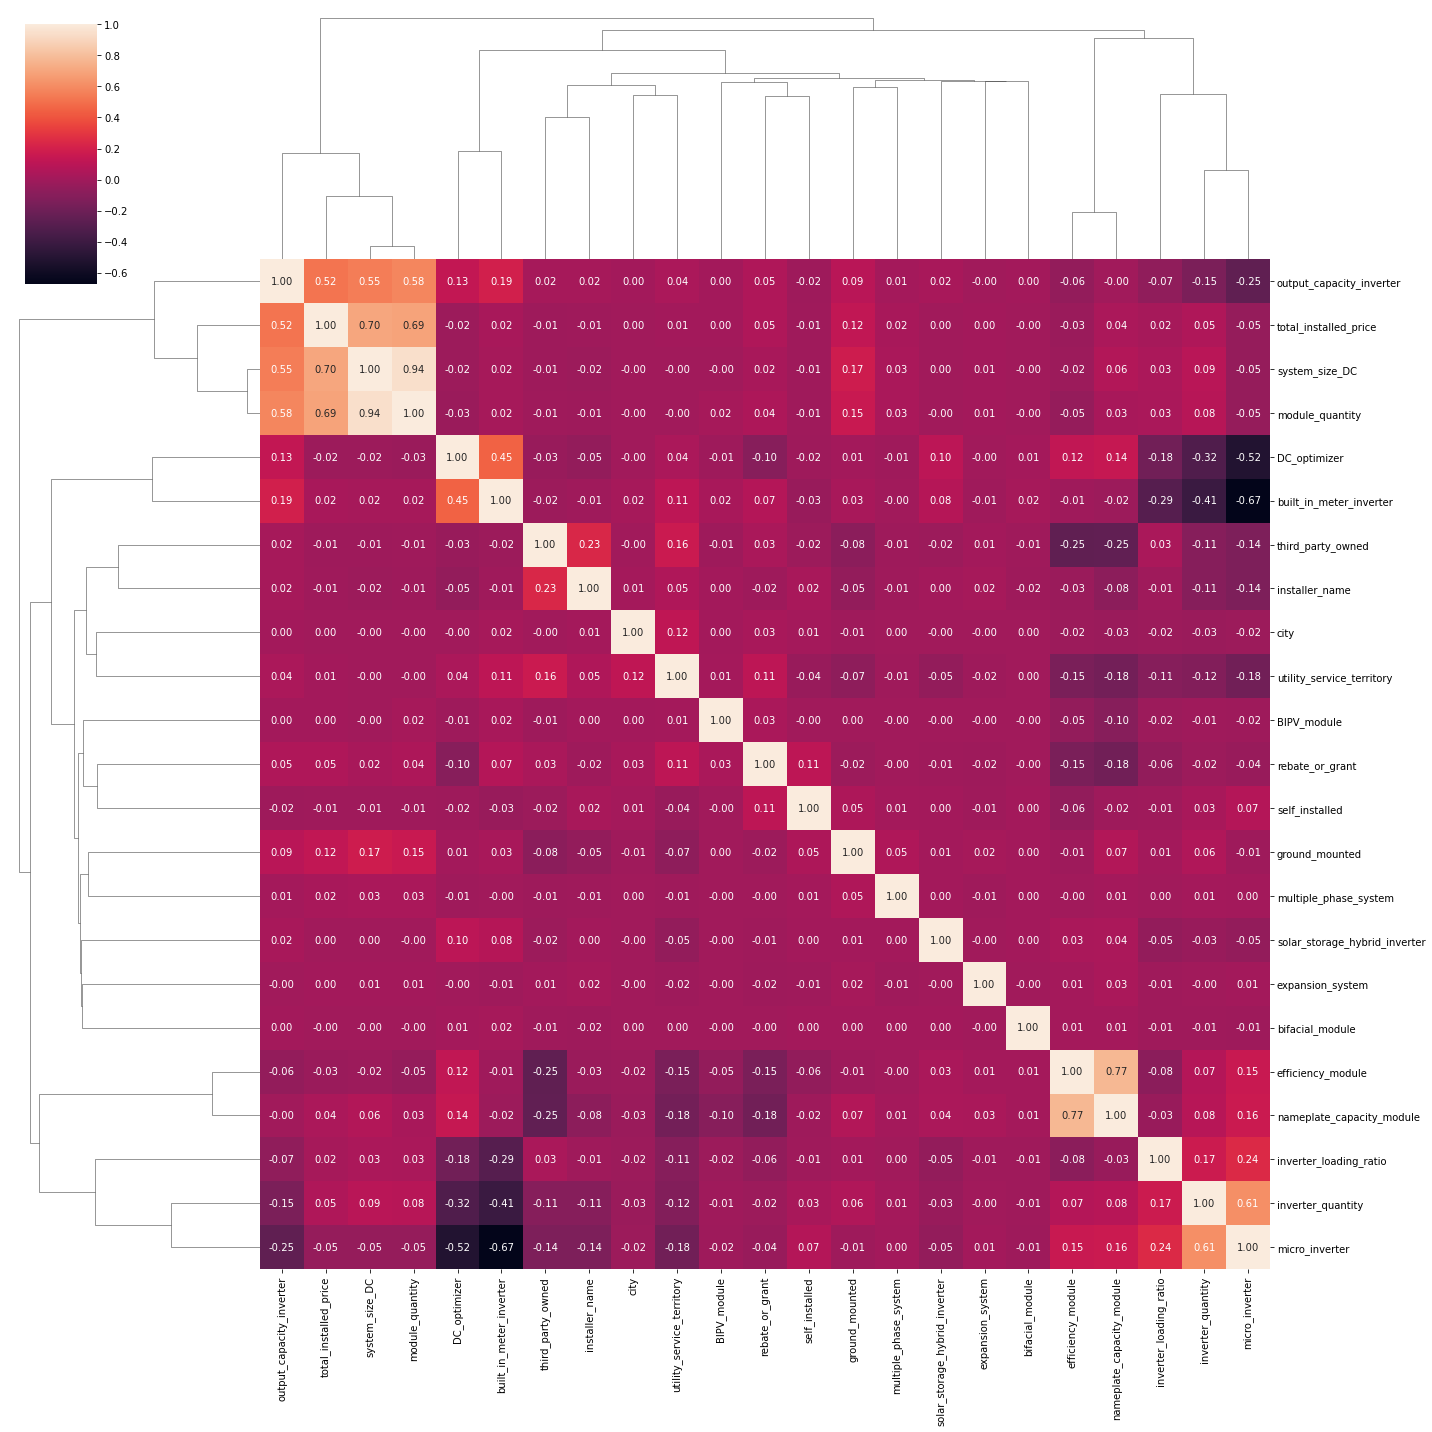

In [142]:
# Piirretään korrelaatiosta kuvaaja
import matplotlib.pyplot as plt
import seaborn as sns

esim109 = df_clean.corrwith(df_clean["total_installed_price"])

esim109

esim110 = df_clean.corr()
#plt.figure(figsize=(1000,1000))
sns.clustermap(esim110,annot=True,fmt=".2f", figsize=(20, 20))
plt.show()